In [1]:
#Linear Regression: Assumption is that output is linear combination of inputs
#Y=w_a*A+w_b*B+b -- b is th offset or bias.  This is called an "affine transformation"
#Linear regression solves for w_i and b (y=w*X+b)
#Need a loss function -- something to quantify the distance from the real and predicted values
#MSE=1/n * Sum((yp-yr)**2)
#MSE is the maximum likelihood of a gaussian.  Minimizing means assuming measurements are distributed through random noise
#in linreg, yr=w*X+b, so fitting means
#L=1/n * Sum((w*X+b-yr)**2); w,b=argmin(L)

#Minimize loss with gradient descent
#Takes too long on whole set.  Feed batch in at a time and compute average loss
#(w,b)_1=(w,b)_0-(R/(N_B))*Sum(dL/d(w,b)
#R is learning rate
#Linear Regression is a 1 layer network inputs-> outputs(w,b)

In [2]:
import random
import torch
from d2l import torch as d2l
#just make 2d normal dist
def Norm2D(w,b,num):
    #A linear dataset. in linreg, len(w) = len(X)
    X=torch.normal(0,1,(num,len(w)))
    #compute output by input and (w,b)
    y = torch.matmul(X, w) + b
    #outputs have some random noise
    y += torch.normal(0, 0.01, y.shape)
    print (X)
    return X, y.reshape((-1, 1))

    print (sigmas)

    
#Dataset slopes
true_w = torch.tensor([2.3, 7.4])
#Dataset intercept
true_b = 4.8
features, labels = Norm2D(true_w, true_b, 1000)

tensor([[-0.2727, -1.0368],
        [ 1.3889,  0.9592],
        [ 0.5856, -0.1356],
        ...,
        [-0.7966, -1.1635],
        [-0.8988, -0.7285],
        [ 0.1917,  1.3397]])


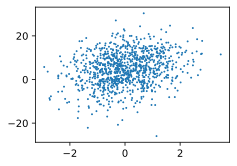

In [3]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (0)].detach().numpy(),
                labels.detach().numpy(), 1);

In [4]:
#shuffle and yield data
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    # shuffle indices
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        # take random indices of size batch_size
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        # yield one batch per step
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1030,  0.0722],
        [ 0.8970,  1.7297],
        [ 0.7341, -0.0274],
        [-0.9055,  0.5303],
        [-0.0998,  0.0206],
        [ 1.7218, -1.2784],
        [ 0.3659,  0.7340],
        [ 1.7080, -1.2196],
        [-0.6464, -2.7417],
        [ 0.8033,  0.8795]]) 
 tensor([[  5.0784],
        [ 19.6592],
        [  6.2778],
        [  6.6357],
        [  4.7199],
        [ -0.7080],
        [ 11.0708],
        [ -0.2918],
        [-16.9721],
        [ 13.1567]])


In [6]:
#Starting parameters 
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print (w,b)

tensor([[ 0.0014],
        [-0.0141]], requires_grad=True) tensor([0.], requires_grad=True)


In [7]:
#Now define the model -- linear regression. weighted sum of inputs + bias
def linreg(X, w, b):  
    return torch.matmul(X, w) + b
def MSE(yr,yp):
    return 0.5*(yr-yp.reshape(yr.shape))**2

In [8]:
#stochastic gradient descent
def sgd(params, lr, batch_size):  
    with torch.no_grad():
        for param in params:
            #So here we just use the already computed gradient and reduce the parameter by this gradient
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
#Training
#1.grab minibatch
#2.send through model
#3.compute loss
#4.call the backwards pass (calculates gradient)
#5.update parameters
lr = 0.003
num_epochs = 3
net = linreg
loss = MSE
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        #We initialized w and b randomly 
        #this computes MSE given the X and y from the data
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        print (w,b)

epoch 1, loss 22.507595
tensor([[0.5081],
        [1.8672]], requires_grad=True) tensor([1.2286], requires_grad=True)
epoch 2, loss 12.582327
tensor([[0.9066],
        [3.2700]], requires_grad=True) tensor([2.1429], requires_grad=True)
epoch 3, loss 7.036689
tensor([[1.2194],
        [4.3161]], requires_grad=True) tensor([2.8236], requires_grad=True)


In [10]:
#Softmax regression
#Linreg is great for fitting, softmax is creat for categorizing 
#for truth values we use one hot encoding
#cat = (1,0,0) dog = (0,1,0) chicken = (0,0,1)
#For training, we want to ouput probabilities 
#Then max probability is value that maximuzes the liklihood
#for the output to be a probability, must sum to 1
#Softmax is a natural way to make sure non negative and sum to 1.  Also, differentiable
#softmax_i=exp(xi)/sum(exp(xj))
#exp smoothly goes to 0, and the denominator is just a normalization
#The maximum likelihood of the softmax is the cross entropy function
#L=-sum(yri log(ypi)
#Note Entropy is -sum(PlogP), cross entropy is  -sum(PlogQ) 


In [91]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [125]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [126]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [127]:
def softmax(X):
    rval=torch.exp(X)
    den = (torch.sum(rval,axis=1)).unsqueeze(1)
    return (rval/den)

In [128]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2209, 0.5505, 0.0664, 0.0559, 0.1063],
         [0.3469, 0.0398, 0.1170, 0.4221, 0.0742]], device='cuda:0'),
 tensor([1., 1.], device='cuda:0'))

In [129]:
def net(X):
    #so this is the neuron matrix.  X is reshaped to be flat.  
    #Number of weights is inputs*outputs, one b per output
    #Matrix multiply inputs we weights
    
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [130]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
print(y_hat[[0, 1], :])

print(y_hat[[0,1], [0,2]])
def cross_entropy(y_hat, y):
    #Take all the examples at the index of the truth label
    #I think this works because we have one how labels so in sum(PlogQ), P is 1 or 0 
    #so we only need one element of the sum. So this is binary cross entropy?

    return -torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])
tensor([0.1000, 0.5000])


tensor([2.3026, 0.6931])

In [131]:
#We want to keep an eye on categorial accuracy.  The fraction of correct predictions
def accuracy(y_hat, y):  #@save
    #argmax gives the index with the maximum value
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())
accuracy(y_hat, y) / len(y)



0.5

In [132]:
def evaluate_accuracy(net, data_iter):  #@save
    """Compute the accuracy for a model on a dataset."""
    if isinstance(net, torch.nn.Module):
        net.eval()  # Set the model to evaluation mode
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [133]:
class Accumulator:  #@save
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [134]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [135]:
class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [136]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [137]:
lr = 0.1

def updater(batch_size):
    return sgd([W, b], lr, batch_size)



<ipython-input-8-d23aec1cd829>:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  param -= lr * param.grad / batch_size


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

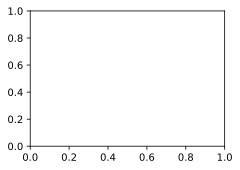

In [138]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)